In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

In [5]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.grid"] = True

sns.set_style("whitegrid")

In [6]:
from google.colab import files
uploaded = files.upload()

Saving ev_charging_stations-india.csv to ev_charging_stations-india.csv


In [11]:
df = pd.read_csv('ev_charging_stations-india.csv')

print("FIRST 10 ROWS:")
display(df.head(10))

print("\nDATAFRAME INFO:")
df.info()

print("\nSUMMARY STATISTICS:")
display(df.describe(include='all'))


FIRST 10 ROWS:


,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0
5,Krishna Hansraj Hotel Una DC charging station,Himachal Pradesh,Una,"Old Hoshiarpur Rd, Una, Himachal Pradesh 174303",31.4668,76.2568,12.0
6,SG Jabli DC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
7,SG Jabli AC Charging Station,Himachal Pradesh,Kasauli,"VPO - Jabli, NH-22, Teh, Kasauli, Himachal Pra...",30.879,76.9948,12.0
8,SG Karnal DC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0
9,SG Karnal AC Charging Station,Haryana,Karnal,"131 km Milestone, G. T, GT Karnal Rd, near Kar...",29.7379,76.9756,12.0



DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB

SUMMARY STATISTICS:


,name,state,city,address,lattitude,longitude,type
count,1547,1547,1547,1507,1541,1.541000e+03,1539.000000
unique,1144,60,362,1180,1202,NaN,NaN
top,Tata Power,Maharashtra,Delhi,Outside Chelmsford Club/ Opposite CSIR Buildin...,28.61826041,NaN,NaN
freq,58,259,72,6,8,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.105323e+05,9.020793
std,NaN,NaN,NaN,NaN,NaN,3.064996e+06,4.136436
min,NaN,NaN,NaN,NaN,NaN,8.058454e+00,6.000000
25%,NaN,NaN,NaN,NaN,NaN,7.562036e+01,7.000000
50%,NaN,NaN,NaN,NaN,NaN,7.721257e+01,7.000000
75%,NaN,NaN,NaN,NaN,NaN,7.847983e+01,11.000000


In [12]:
print("Missing values:")
print(df.isnull().sum())

print("\nNumber of unique states:", df['state'].nunique())
print("Number of unique cities:", df['city'].nunique())

print("\nUnique charging types:", df['type'].unique())

print("\nDuplicate rows:", df.duplicated().sum())

print("Duplicates (name + coordinates):", df.duplicated(subset=['name','lattitude','longitude']).sum())


Missing values:
name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

Number of unique states: 60
Number of unique cities: 362

Unique charging types: [12.  6.  7. 13. 14.  8. 15. 16. 17. 18. 19. nan 20. 21. 11. 10. 24. 22.
 23.]

Duplicate rows: 205
Duplicates (name + coordinates): 325


In [13]:
df = df.rename(columns={'lattitude': 'latitude'})

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.drop_duplicates()
df = df.dropna(subset=['latitude', 'longitude'])

print("Shape after cleaning:", df.shape)


Shape after cleaning: (1335, 7)


In [14]:
state_counts = df['state'].value_counts()

print("Top 15 states with most charging stations:\n")
print(state_counts.head(15))

print("\nBottom 10 states with least charging stations:\n")
print(state_counts.tail(10))


Top 15 states with most charging stations:

state
Maharashtra       220
Delhi             124
Karnataka         124
Tamil Nadu        111
Kerala             78
Uttar Pradesh      76
Telangana          66
Gujarat            60
Haryana            56
Rajasthan          55
Delhi NCR          48
West Bengal        43
Andhra Pradesh     31
Odisha             26
Andhra pradesh     24
Name: count, dtype: int64

Bottom 10 states with least charging stations:

state
Hisar          1
Ernakulam      1
Limbdi         1
Kochi          1
Jajpur         1
Rajahmundry    1
Uttarkhand     1
Karala         1
Tripura        1
Andaman        1
Name: count, dtype: int64


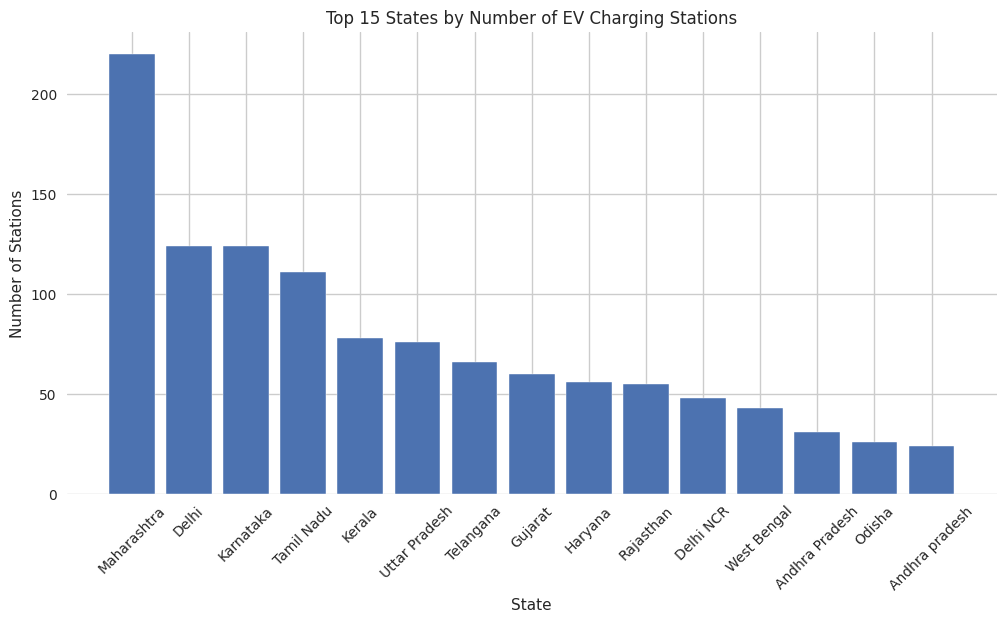

In [15]:
top_states = state_counts.head(15)

plt.figure(figsize=(12,6))
plt.bar(top_states.index, top_states.values)
plt.xticks(rotation=45)
plt.title("Top 15 States by Number of EV Charging Stations")
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.show()


In [24]:
df['city'] = df['city'].str.lower().str.strip()

city_corrections = {
    'banglore': 'bangalore',
    'bengaluru': 'bangalore',

    'mumbai ': 'mumbai',
    'mumbai': 'mumbai',

    'chennai ': 'chennai',
    'chennai': 'chennai',

    'hyderabad ': 'hyderabad',
    'hyderabad': 'hyderabad',

    'pune ': 'pune',
    'pune': 'pune',

    'bangalore ': 'bangalore'
}

df['city'] = df['city'].replace(city_corrections)

df['city'] = df['city'].str.title()

In [25]:
city_counts = df['city'].value_counts()

print("Top 20 cities:\n")
print(city_counts.head(20))

Top 20 cities:

city
Bangalore      111
Delhi           76
New Delhi       73
Chennai         66
Mumbai          65
Hyderabad       57
Pune            46
Ahmedabad       32
Noida           27
Gurgaon         25
Jaipur          24
Kochi           22
Nashik          21
Gurugram        20
Kolkata         17
Goa             14
Coimbatore      14
Ghaziabad       13
Raipur          13
Bhubaneswar     12
Name: count, dtype: int64


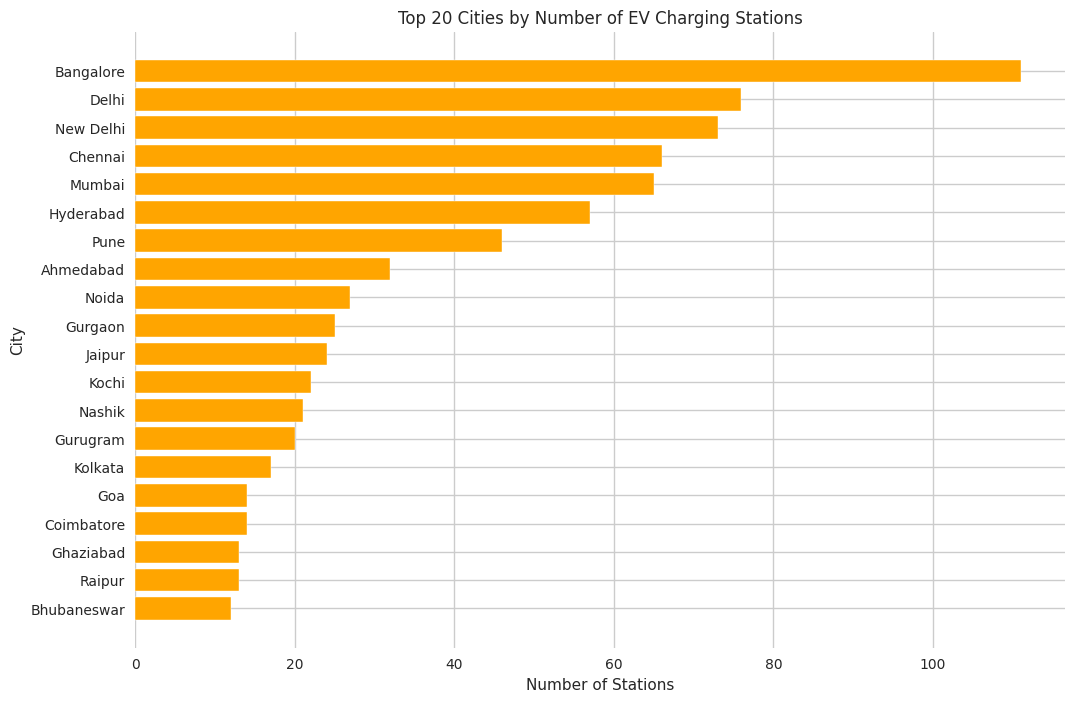

In [26]:
top_cities = city_counts.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_cities.index, top_cities.values, color='orange')
plt.title("Top 20 Cities by Number of EV Charging Stations")
plt.xlabel("Number of Stations")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()

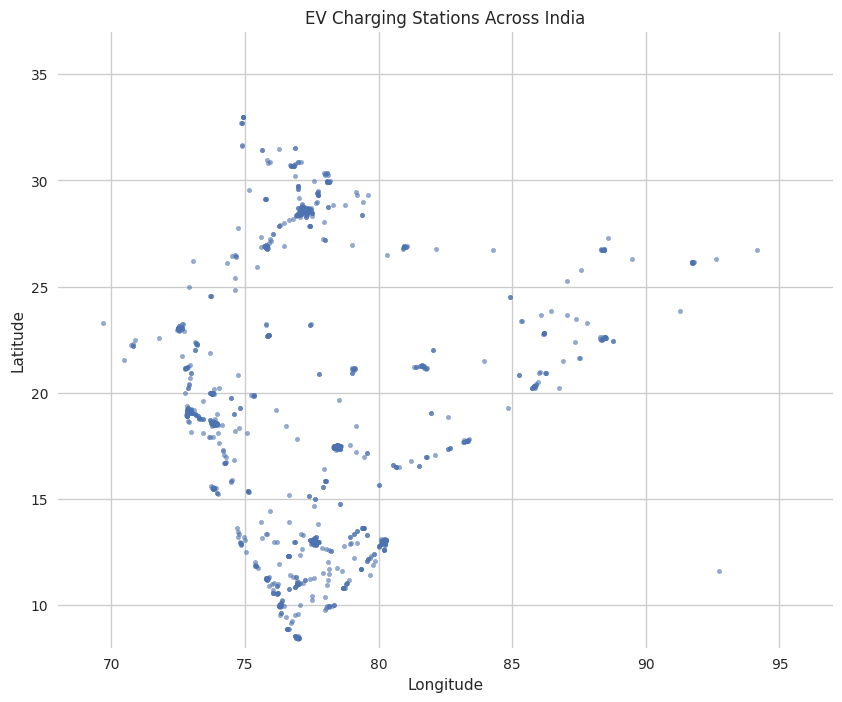

In [27]:
plt.figure(figsize=(10, 8))

plt.scatter(df['longitude'], df['latitude'], s=10, alpha=0.6)

plt.title("EV Charging Stations Across India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.xlim(68, 97)
plt.ylim(8, 37)

plt.show()


Charging Type Counts:
type
6.0     304
7.0     527
8.0     131
10.0     10
11.0     41
12.0    126
13.0     22
14.0      4
15.0     25
16.0     37
17.0      9
18.0     15
19.0     18
20.0     20
21.0      8
22.0      3
23.0     10
24.0     17
Name: count, dtype: int64


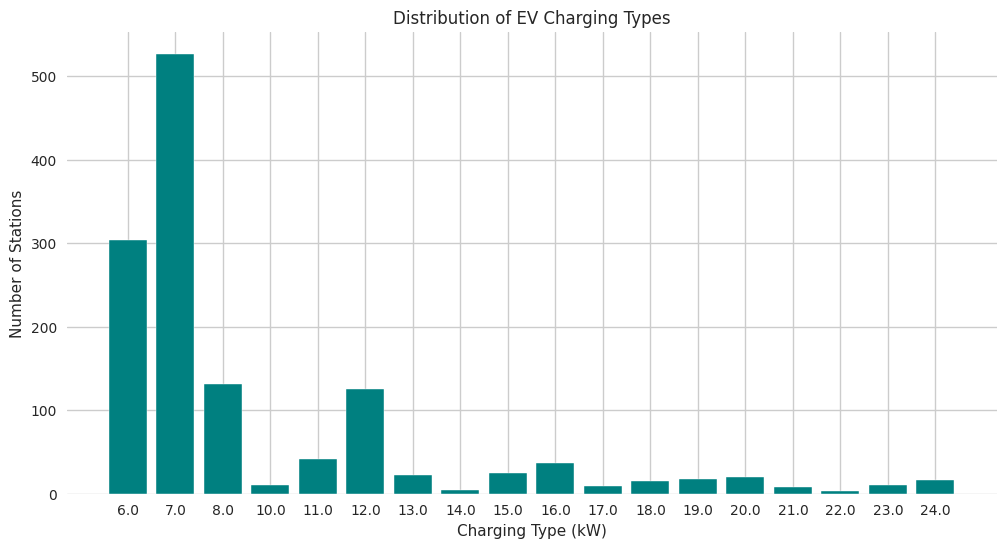

In [28]:
type_counts = df['type'].dropna().value_counts().sort_index()

print("Charging Type Counts:")
print(type_counts)

plt.figure(figsize=(12,6))
plt.bar(type_counts.index.astype(str), type_counts.values, color='teal')
plt.title("Distribution of EV Charging Types")
plt.xlabel("Charging Type (kW)")
plt.ylabel("Number of Stations")
plt.show()


In [29]:
X = df[['latitude', 'longitude']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix shape:", X.shape)
print("Scaled sample:", X_scaled[:5])


Feature matrix shape: (1335, 2)
Scaled sample: [[ 1.34895444 -0.02737945]
 [ 1.18909832 -0.02737941]
 [ 1.10566205 -0.02737976]
 [ 1.3078985  -0.02737914]
 [ 1.3078985  -0.02737914]]


In [30]:
lat_min, lat_max = 6, 38
lon_min, lon_max = 68, 98

df_clean = df[
    (df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
    (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)
].copy()

print("Original rows:", len(df))
print("Rows after removing outliers:", len(df_clean))
print("Outliers removed:", len(df) - len(df_clean))

X = df_clean[['latitude', 'longitude']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Original rows: 1335
Rows after removing outliers: 1331
Outliers removed: 4


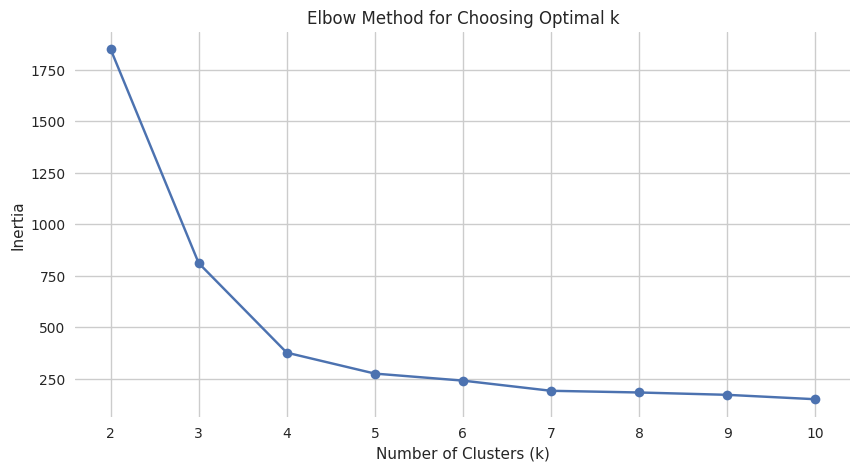

In [31]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Choosing Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [32]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

print("Cluster counts:")
print(df_clean['cluster'].value_counts())


Cluster counts:
cluster
3    425
2    384
1    296
4    137
0     89
Name: count, dtype: int64


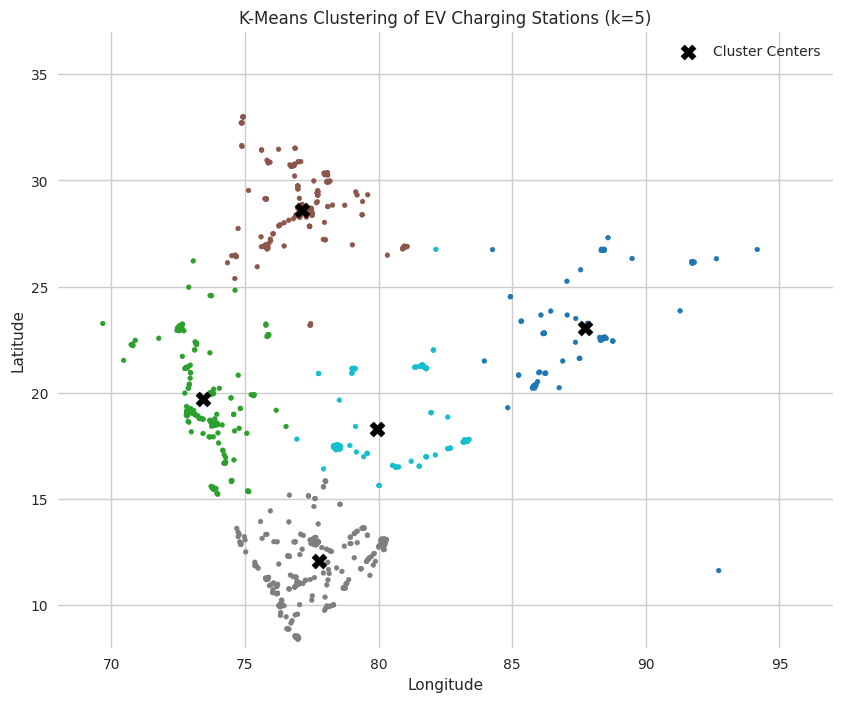

In [33]:
plt.figure(figsize=(10, 8))

plt.scatter(
    df_clean['longitude'],
    df_clean['latitude'],
    c=df_clean['cluster'],
    cmap='tab10',
    s=12
)

centers = kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers)

plt.scatter(
    centers_unscaled[:, 1],
    centers_unscaled[:, 0],
    c='black',
    s=120,
    marker='X',
    label='Cluster Centers'
)

plt.title("K-Means Clustering of EV Charging Stations (k=5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(68, 97)
plt.ylim(8, 37)
plt.legend()
plt.show()

In [35]:
print("Key Insights:\n")

print("Top 5 states with most charging stations:")
print(df['state'].value_counts().head(5), "\n")

print("Top 5 cities with most charging stations:")
print(df['city'].value_counts().head(5), "\n")

print("Cluster distribution (k=5):")
print(df_clean['cluster'].value_counts(), "\n")

print("Most common charging types:")
print(df['type'].value_counts().head(5), "\n")

print("Observations:")
print("1.Bangalore, Delhi, New Delhi, Chennai, and Mumbai have the highest concentration of stations.")
print("2.North-East India, Rajasthan interiors, and Himalayan areas have very few stations.")
print("3.7 kW chargers are the most common, followed by 6 kW and 12 kW.")
print("4.Clusters show clear regional grouping of stations.\n")

print("Recommendations:")
print("1.Add more stations in under-served regions like NE India, Rajasthan, Odisha, and hill states.")
print("2.Increase fast-charging options (higher kW).")
print("3.Improve highway corridor connectivity between major cities.")


Key Insights:

Top 5 states with most charging stations:
state
Maharashtra    220
Delhi          124
Karnataka      124
Tamil Nadu     111
Kerala          78
Name: count, dtype: int64 

Top 5 cities with most charging stations:
city
Bangalore    111
Delhi         76
New Delhi     73
Chennai       66
Mumbai        65
Name: count, dtype: int64 

Cluster distribution (k=5):
cluster
3    425
2    384
1    296
4    137
0     89
Name: count, dtype: int64 

Most common charging types:
type
7.0     527
6.0     304
8.0     131
12.0    126
11.0     41
Name: count, dtype: int64 

Observations:
1.Bangalore, Delhi, New Delhi, Chennai, and Mumbai have the highest concentration of stations.
2.North-East India, Rajasthan interiors, and Himalayan areas have very few stations.
3.7 kW chargers are the most common, followed by 6 kW and 12 kW.
4.Clusters show clear regional grouping of stations.

Recommendations:
1.Add more stations in under-served regions like NE India, Rajasthan, Odisha, and hill states.